In [1]:
import pandas as pd
from folium.plugins import HeatMap
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
import os 
filepath = os.path.join(os.getcwd(), 'Dados', 'dataset_tratado.csv')

In [22]:
# Cria o DataFrame completo, com todos os dados do arquivo dataset_grad_pres.csv

df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', header=0, sep = ",")

In [23]:
df_completo

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,BAIXA_RENDA,ESCOLA_PUBLICA,ETNIA_PPI,PCD,ESTADO
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.753129,"VALE DO IPE, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.804313,"PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não,NaN
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,-21.750069,"SANTA CATARINA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
3,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,-21.718564,"ANDRELANDIA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-20.850899,"PAULA CANDIDO, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52604,2023,1,SiSU,Grupo A,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,...,-20.678101,"CANAA, MG, BRASIL",-42.609760,-20.678101,"CANAA, MG, BRASIL",Sim,Sim,Sim,Não,MG
52605,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,...,-15.601411,"CUIABA, MT, BRASIL",-56.097892,-15.601411,"CUIABA, MT, BRASIL",Não,Não,Não,Não,MT
52606,2023,1,SiSU,Grupo C,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Ativo,A Especificar,JUIZ DE FORA,INTEGRAL,...,-22.470962,"RESENDE, RJ, BRASIL",-44.451329,-22.470962,"RESENDE, RJ, BRASIL",Não,Não,Não,Não,RJ
52607,2023,1,PISM,Grupo B,BACHARELADO EM DESIGN,Lingüística Letras e Artes,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,-21.120123,"UBA, MG, BRASIL",-42.942619,-21.120123,"UBA, MG, BRASIL",Sim,Sim,Não,Não,MG


In [24]:
valores_nan = df_completo['LOCAL_ORGM'].isna().sum()
valores_nan

18447

In [25]:
df_completo = df_completo.dropna(subset=['LOCAL_ORGM'])

In [27]:
df_completo['LOCAL_ORGM'].isna().sum()

0

In [29]:
df_completo['ESTADO']

27       MG
49       MG
50       MG
51       MG
52       MG
         ..
52604    MG
52605    MT
52606    RJ
52607    MG
52608    MG
Name: ESTADO, Length: 34162, dtype: object

In [30]:
df_evadidos = df_completo[df_completo['SITUACAO'] == 'Evadido']

In [31]:
# Contar o número de alunos evadidos por estado
contagem_evadidos_por_estado = df_evadidos['ESTADO'].value_counts()
contagem_evadidos_por_estado

ESTADO
MG    8564
RJ     926
SP     231
ES     106
BA      28
DF      15
RS      10
GO      10
MS       7
PA       7
CE       7
PR       6
RO       5
SE       4
SC       3
AC       3
AM       2
MT       2
TO       1
PI       1
MA       1
PB       1
RN       1
Name: count, dtype: int64

In [33]:
# Use groupby para agrupar os dados por 'estado' e aplique a função count() para contar as linhas por estado
evadidos_por_estado = df_evadidos.groupby('ESTADO').size().reset_index(name='Número de alunos evadidos')

In [34]:
# Contar o número total de alunos por estado
contagem_total_por_estado = df_completo['ESTADO'].value_counts()
contagem_total_por_estado

ESTADO
MG    29320
RJ     3410
SP      736
ES      351
BA       84
DF       41
GO       37
RS       27
PA       24
MS       23
PR       16
CE       14
MT       14
RO       12
SE        8
SC        8
MA        7
AM        6
PB        5
PE        4
AC        4
RN        4
TO        2
RR        2
AP        2
PI        1
Name: count, dtype: int64

In [35]:
# Garantir que as séries tenham os mesmos índices para a divisão
evadidos_por_estado = contagem_total_por_estado.reindex(contagem_total_por_estado.index, fill_value=0)

In [36]:
# Calcular a proporção de alunos evadidos por estado em relação ao total de alunos por estado
proporcao_por_estado = ( contagem_evadidos_por_estado / contagem_total_por_estado ) * 100
proporcao_por_estado

ESTADO
AC     75.000000
AM     33.333333
AP           NaN
BA     33.333333
CE     50.000000
DF     36.585366
ES     30.199430
GO     27.027027
MA     14.285714
MG     29.208731
MS     30.434783
MT     14.285714
PA     29.166667
PB     20.000000
PE           NaN
PI    100.000000
PR     37.500000
RJ     27.155425
RN     25.000000
RO     41.666667
RR           NaN
RS     37.037037
SC     37.500000
SE     50.000000
SP     31.385870
TO     50.000000
Name: count, dtype: float64

In [41]:
# Ordenar o DataFrame por proporção
proporcao_por_estado = proporcao_por_estado.sort_values(ascending=False)
proporcao_por_estado

ESTADO
PI    100.000000
AC     75.000000
SE     50.000000
TO     50.000000
CE     50.000000
RO     41.666667
PR     37.500000
SC     37.500000
RS     37.037037
DF     36.585366
BA     33.333333
AM     33.333333
SP     31.385870
MS     30.434783
ES     30.199430
MG     29.208731
PA     29.166667
RJ     27.155425
GO     27.027027
RN     25.000000
PB     20.000000
MT     14.285714
MA     14.285714
AP           NaN
PE           NaN
RR           NaN
Name: count, dtype: float64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


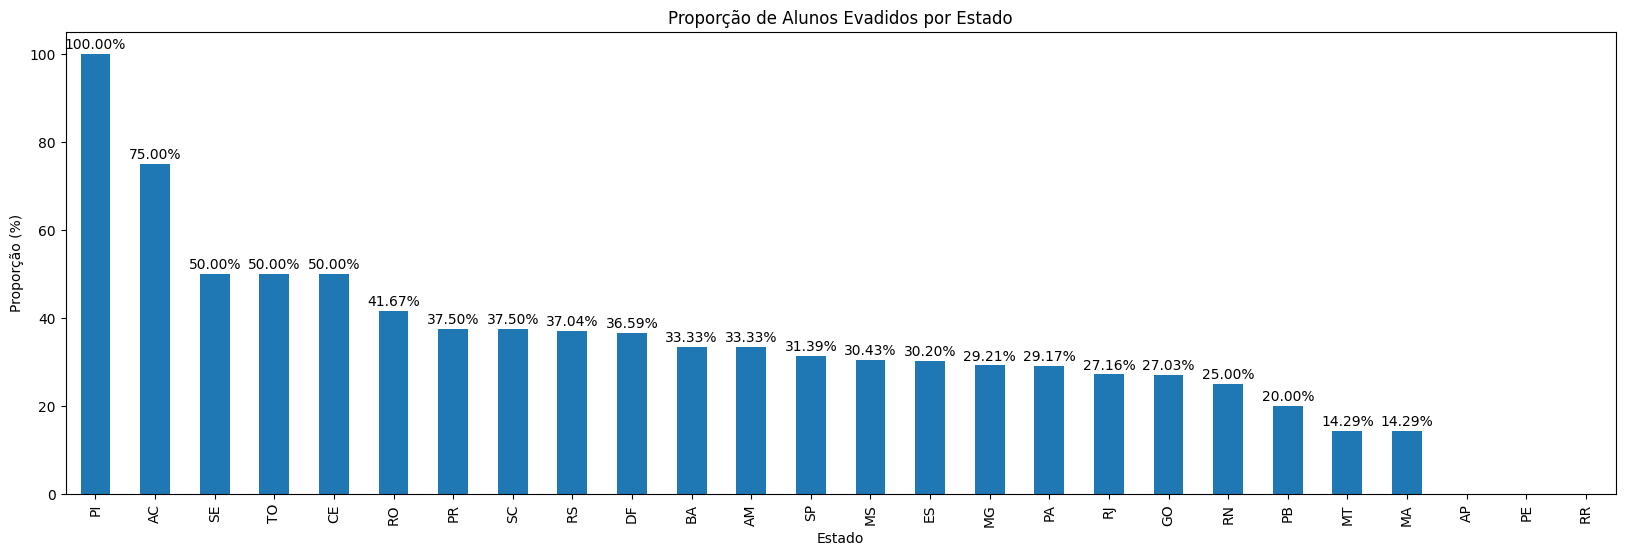

In [42]:
# Criar um gráfico de barras
plt.figure(figsize=(20, 6))
bars = proporcao_por_estado.plot(kind='bar')
plt.title('Proporção de Alunos Evadidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Proporção (%)')

# Adicionar os números nas barras
for i, v in enumerate(proporcao_por_estado):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

#interpretar esse dado levando em consideração os números absolutos, pois PI possui 1 ingresso e 1 evadido dando a proporção de 100%. Abaixo temos os 4 principais estados
#com alunos ingressantes e evadidos. Destacar estes na discussão.
# MG   29320
#RJ     3410
#SP      736
#ES      351